# 1: Visualizing patterns in the data

As required, we are just working with the data from **January 1st 2003 to December 31st 2017** to be exact. 
And we are focusing on the **focus-crimes**. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
pd.options.mode.copy_on_write = True

In [2]:
# read data, then filter date from 2003-2017
src_data =  pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv')
src_data['Date'] = pd.to_datetime(src_data['Date'], format='%m/%d/%Y')
required_range_data = src_data[(src_data['Date'] >= '2003-01-01') & (src_data['Date'] <= '2017-12-31')]

In [3]:
# extract the focus-crimes only
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data = required_range_data[required_range_data['Category'].isin(focuscrimes)]

## 1.1: Barcharts

We define a common function used for rendering any results generated, displaying every two sub charts in a row, and showing the xticks in the end.

In [4]:
# render_result function is used for rendering the barcharts for any result
def render_result(result, suptitle, xticks, major_locator = None):
    column_num = 2
    num_subplot_rows = (len(focuscrimes) + 1) // column_num
    # start initializing the whole barcharts
    fig, axes = plt.subplots(num_subplot_rows, column_num, figsize=(12, 4 * num_subplot_rows))
    fig.suptitle('Crime Counts by ' + suptitle +' for Each Category')

    # start initializing the sub barcharts
    for i, category in enumerate(result.index):
        ax = axes[i // column_num, i % column_num]
        result.loc[category].plot(kind='bar', ax=ax, color='violet', alpha=0.2, edgecolor='black', linewidth=1.5)
        # render sub barchart
        ax.text(0.05, 0.9, category, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')
        ax.set_ylabel('Crime Count')
        ax.set_ylim(0, 1.5 * result.loc[category].max())
        #only charts in last line show labels in x
        if i // column_num == num_subplot_rows - 1:
            ax.set_xlabel(suptitle)
            ax.set_xticklabels(xticks)
            if major_locator != None:
                ax.xaxis.set_major_locator(major_locator)
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])

    # show
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()
    return

**First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).**

### 1.1.1: The week-day plots

In [5]:
# statistics
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeekInOrder'] = data['DayOfWeek'].astype(pd.CategoricalDtype(categories=days_order, ordered=True))
result = data.groupby(['Category', 'DayOfWeekInOrder']).size().unstack()

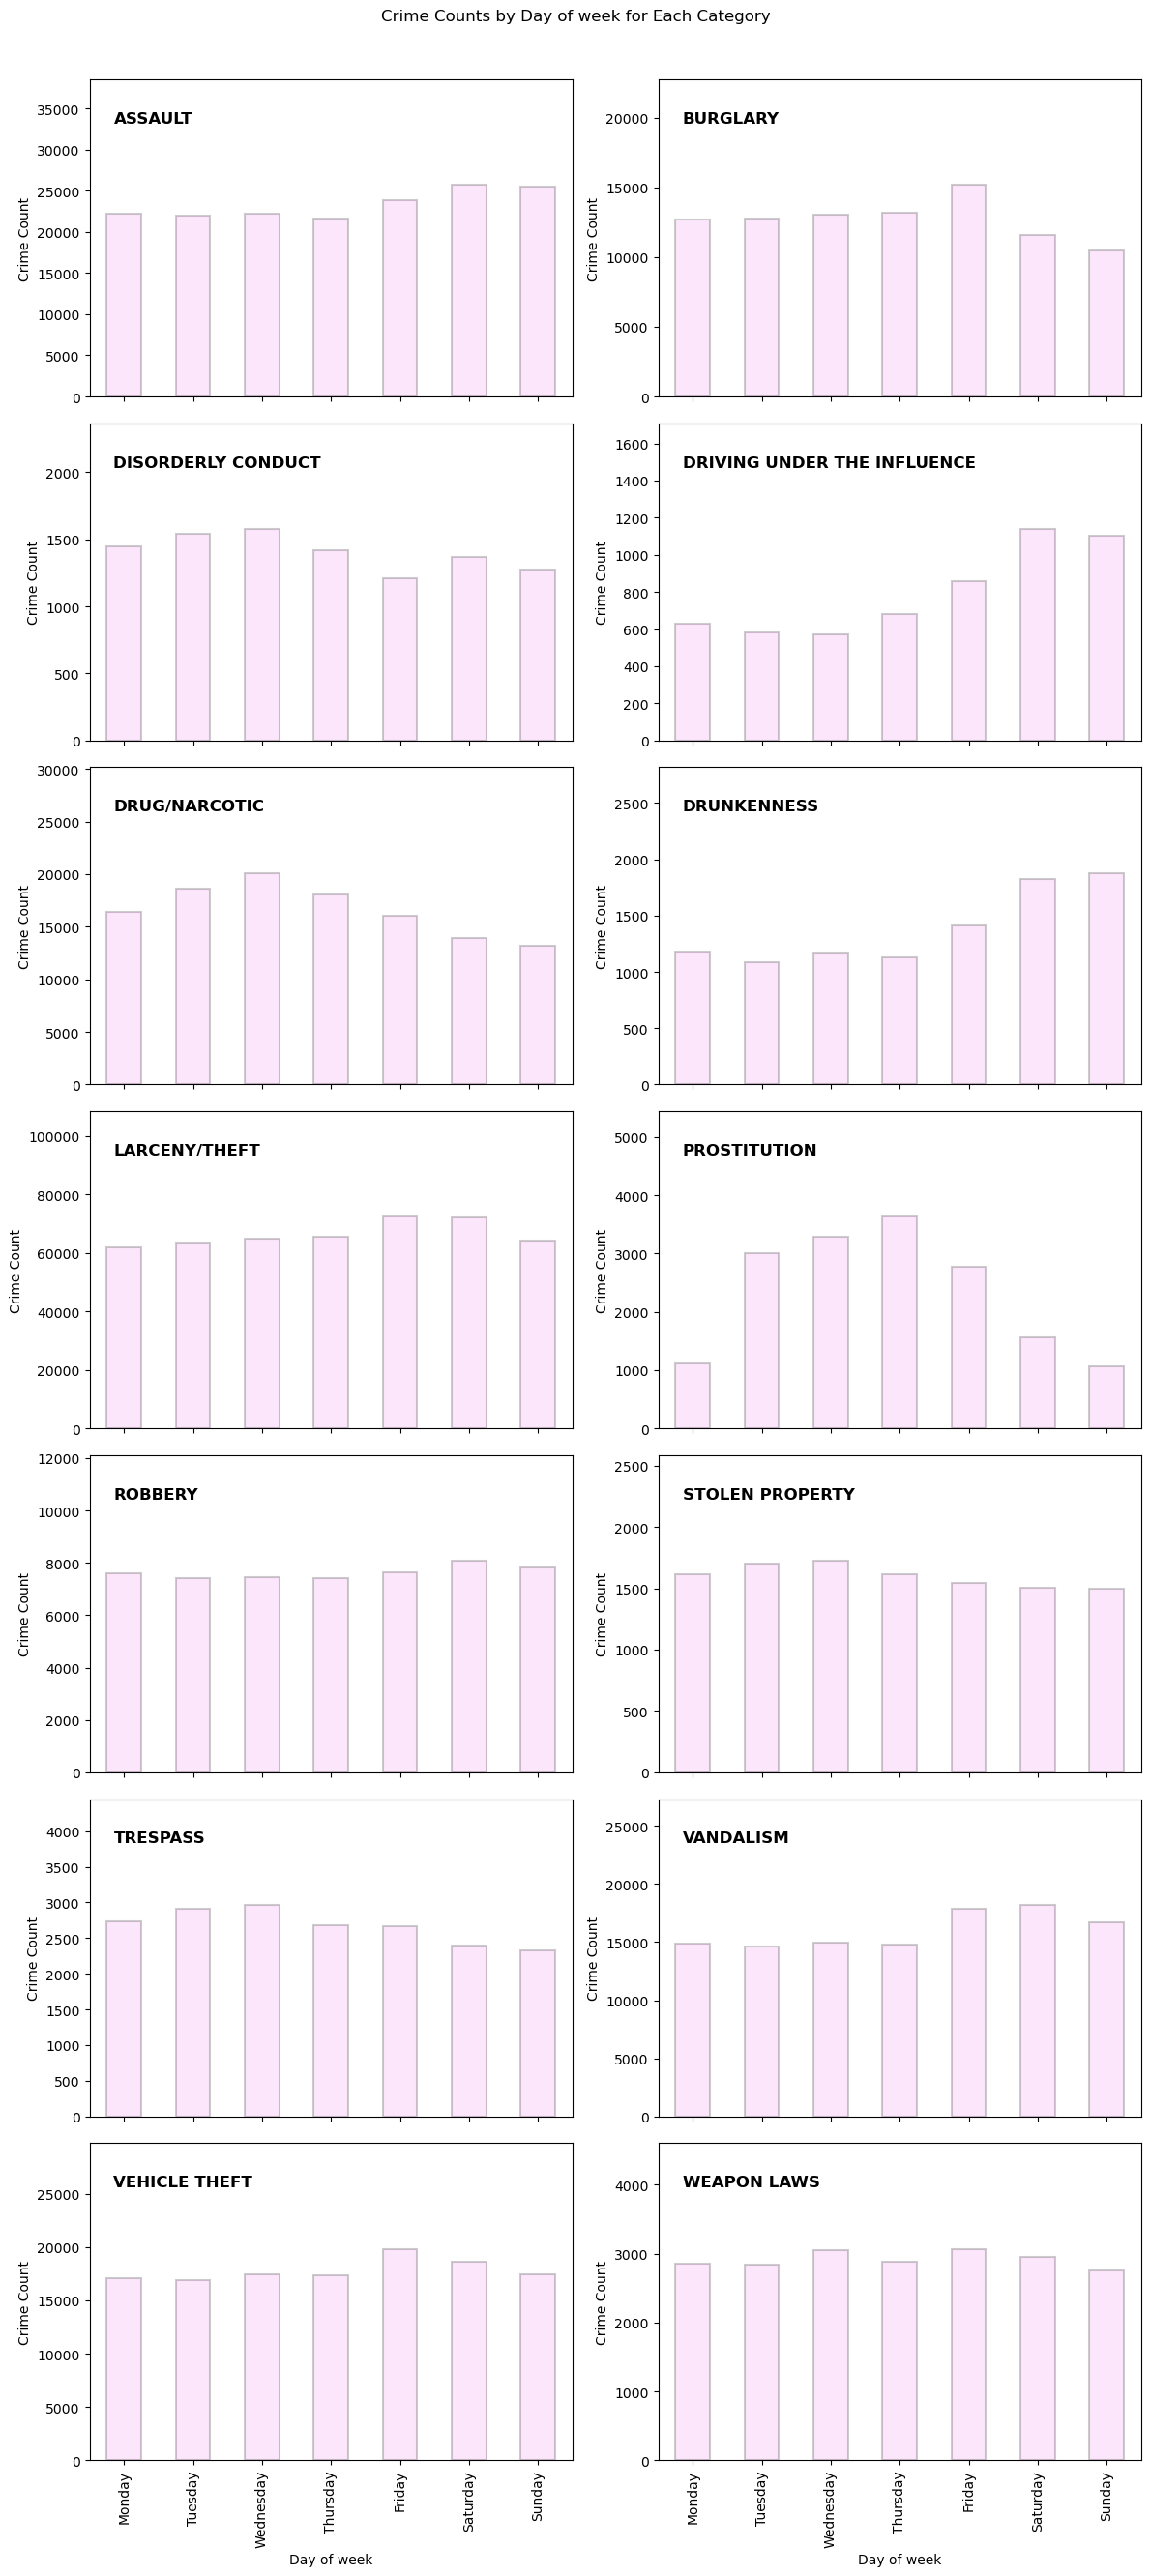

In [6]:
# render
render_result(result, 'Day of week', days_order)

**Weekend Crime**: Many crime categories, such as assult, driving under the influence, drunkness and theft, exhibit relatively higher numbers on Weekends. While, the most rest of crimes shows the opposite trend.

This may be associated with increased social activities, nightlife, and people being outdoors during the weekend.

### 1.1.2: The months plots

In [7]:
# statistics
data['Month'] = data['Date'].astype(str).str[5:7]
result = data.groupby(['Category', 'Month']).size().unstack()

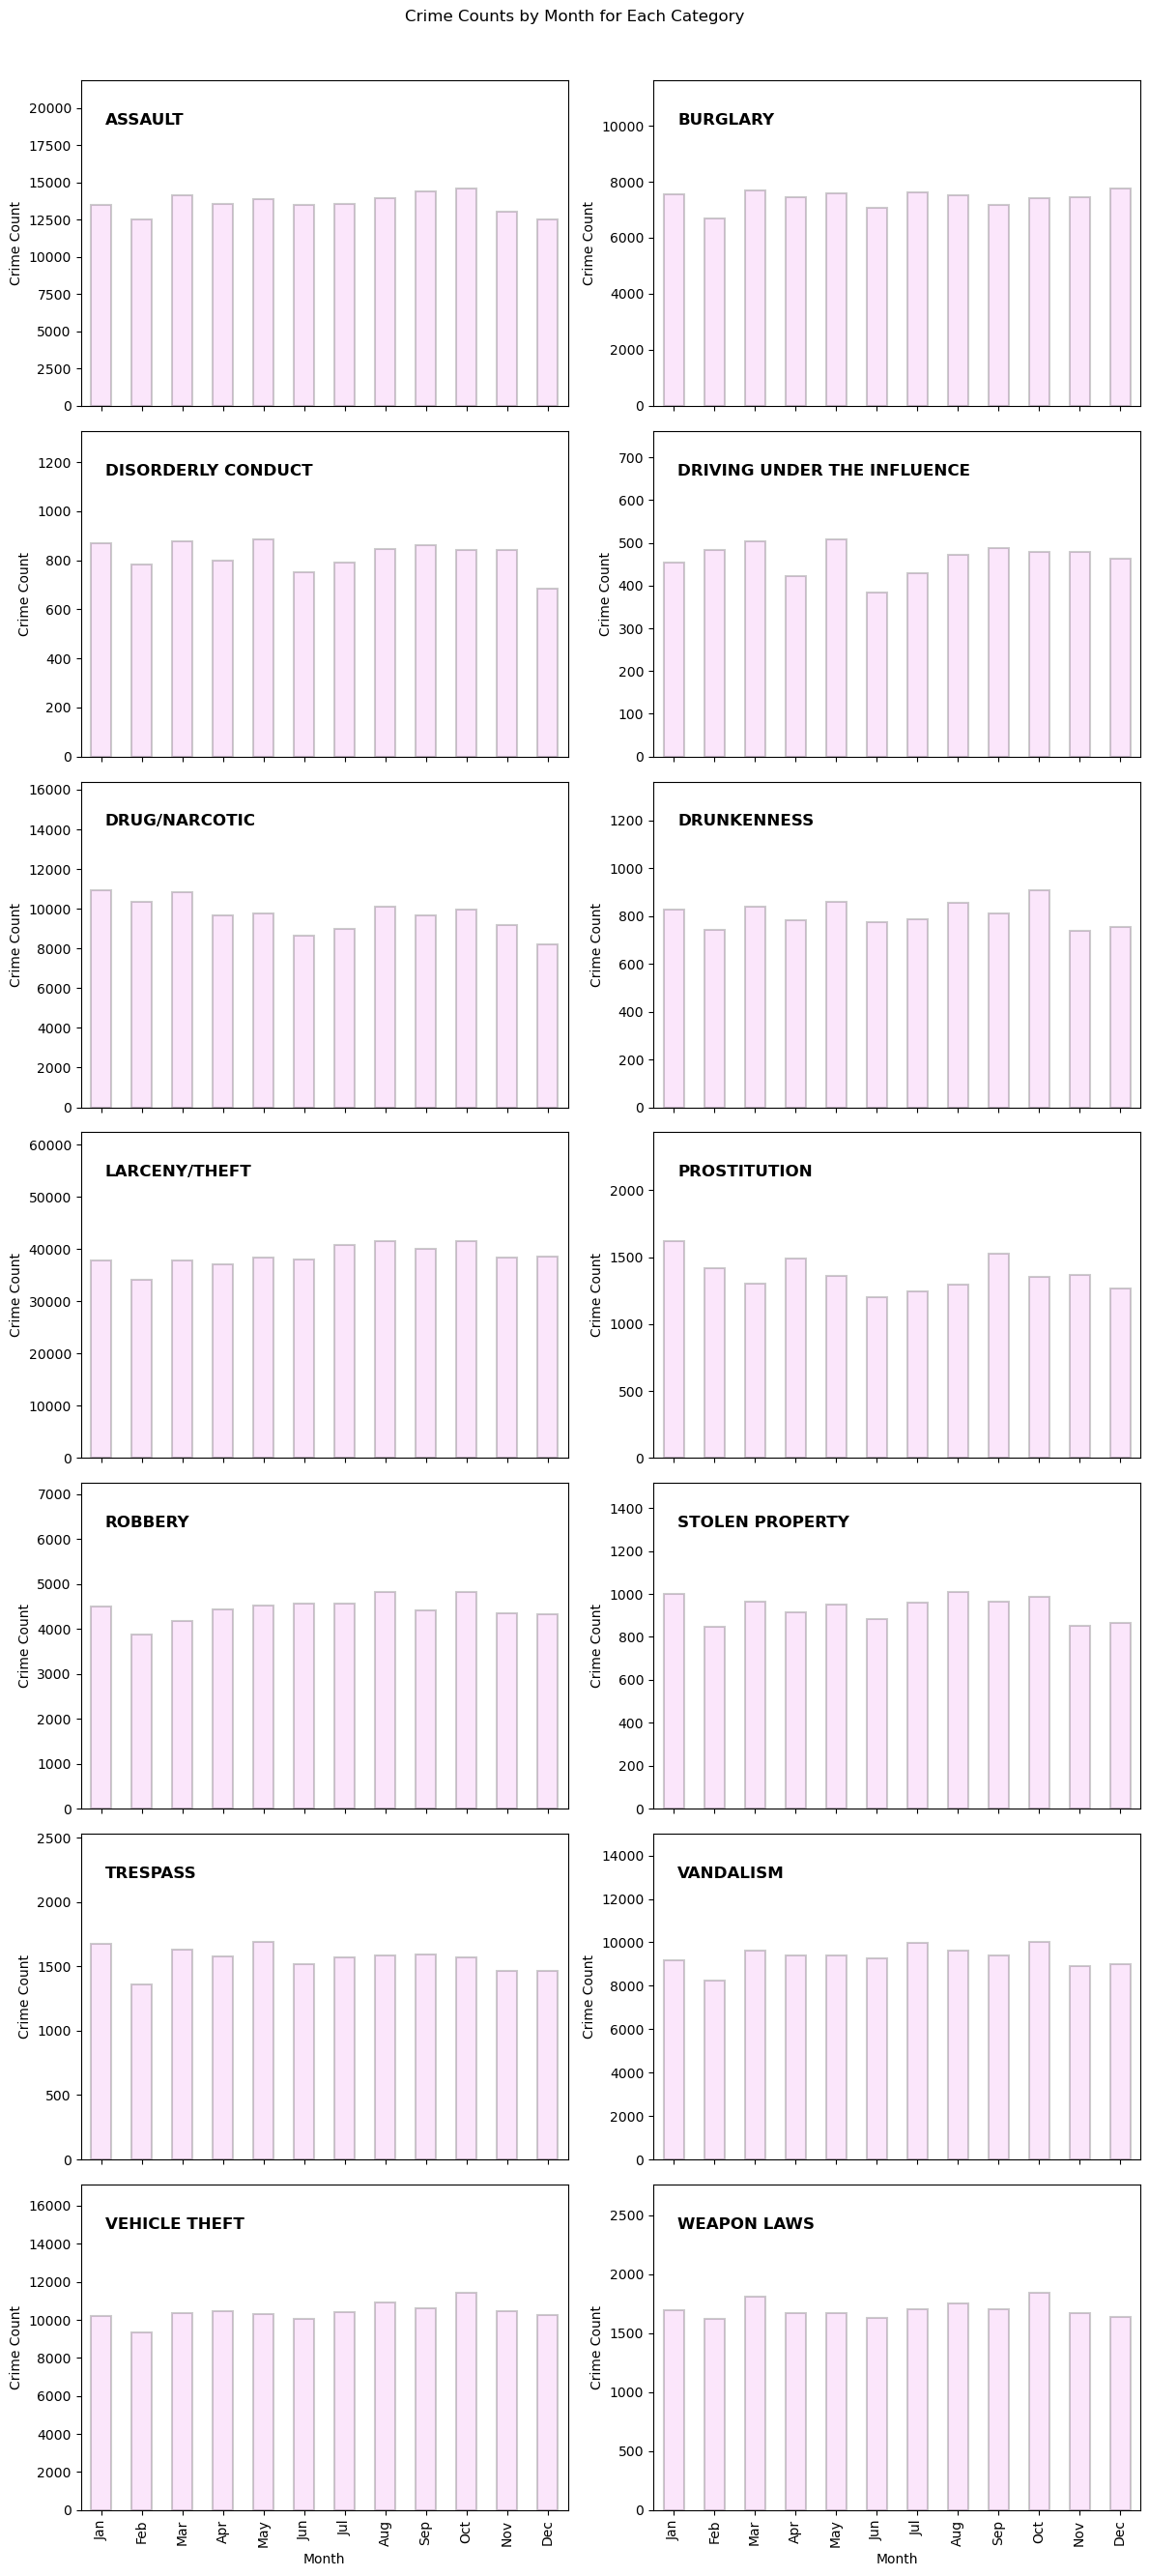

In [8]:
# render
months_xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
render_result(result, 'Month', months_xticks)

**Seasonal Fluctuations**: Many crime categories exhibit seasonal fluctuations across different months. Generally, warmer seasons might see an increase in outdoor activities, while colder months could lead to a decrease in certain crime numbers.

**Fluctuations in Prostitution and Drunkenness**:
Prostitution and drunkenness behaviors show variations across certain months, possibly linked to specific periods of social activities, holidays, or other cultural factors.

### 1.1.3: The 24-hour cycle plots

In [9]:
# statistics
data['Hour'] = data['Time'].astype(str).str[0:2]
result = data.groupby(['Category', 'Hour']).size().unstack()

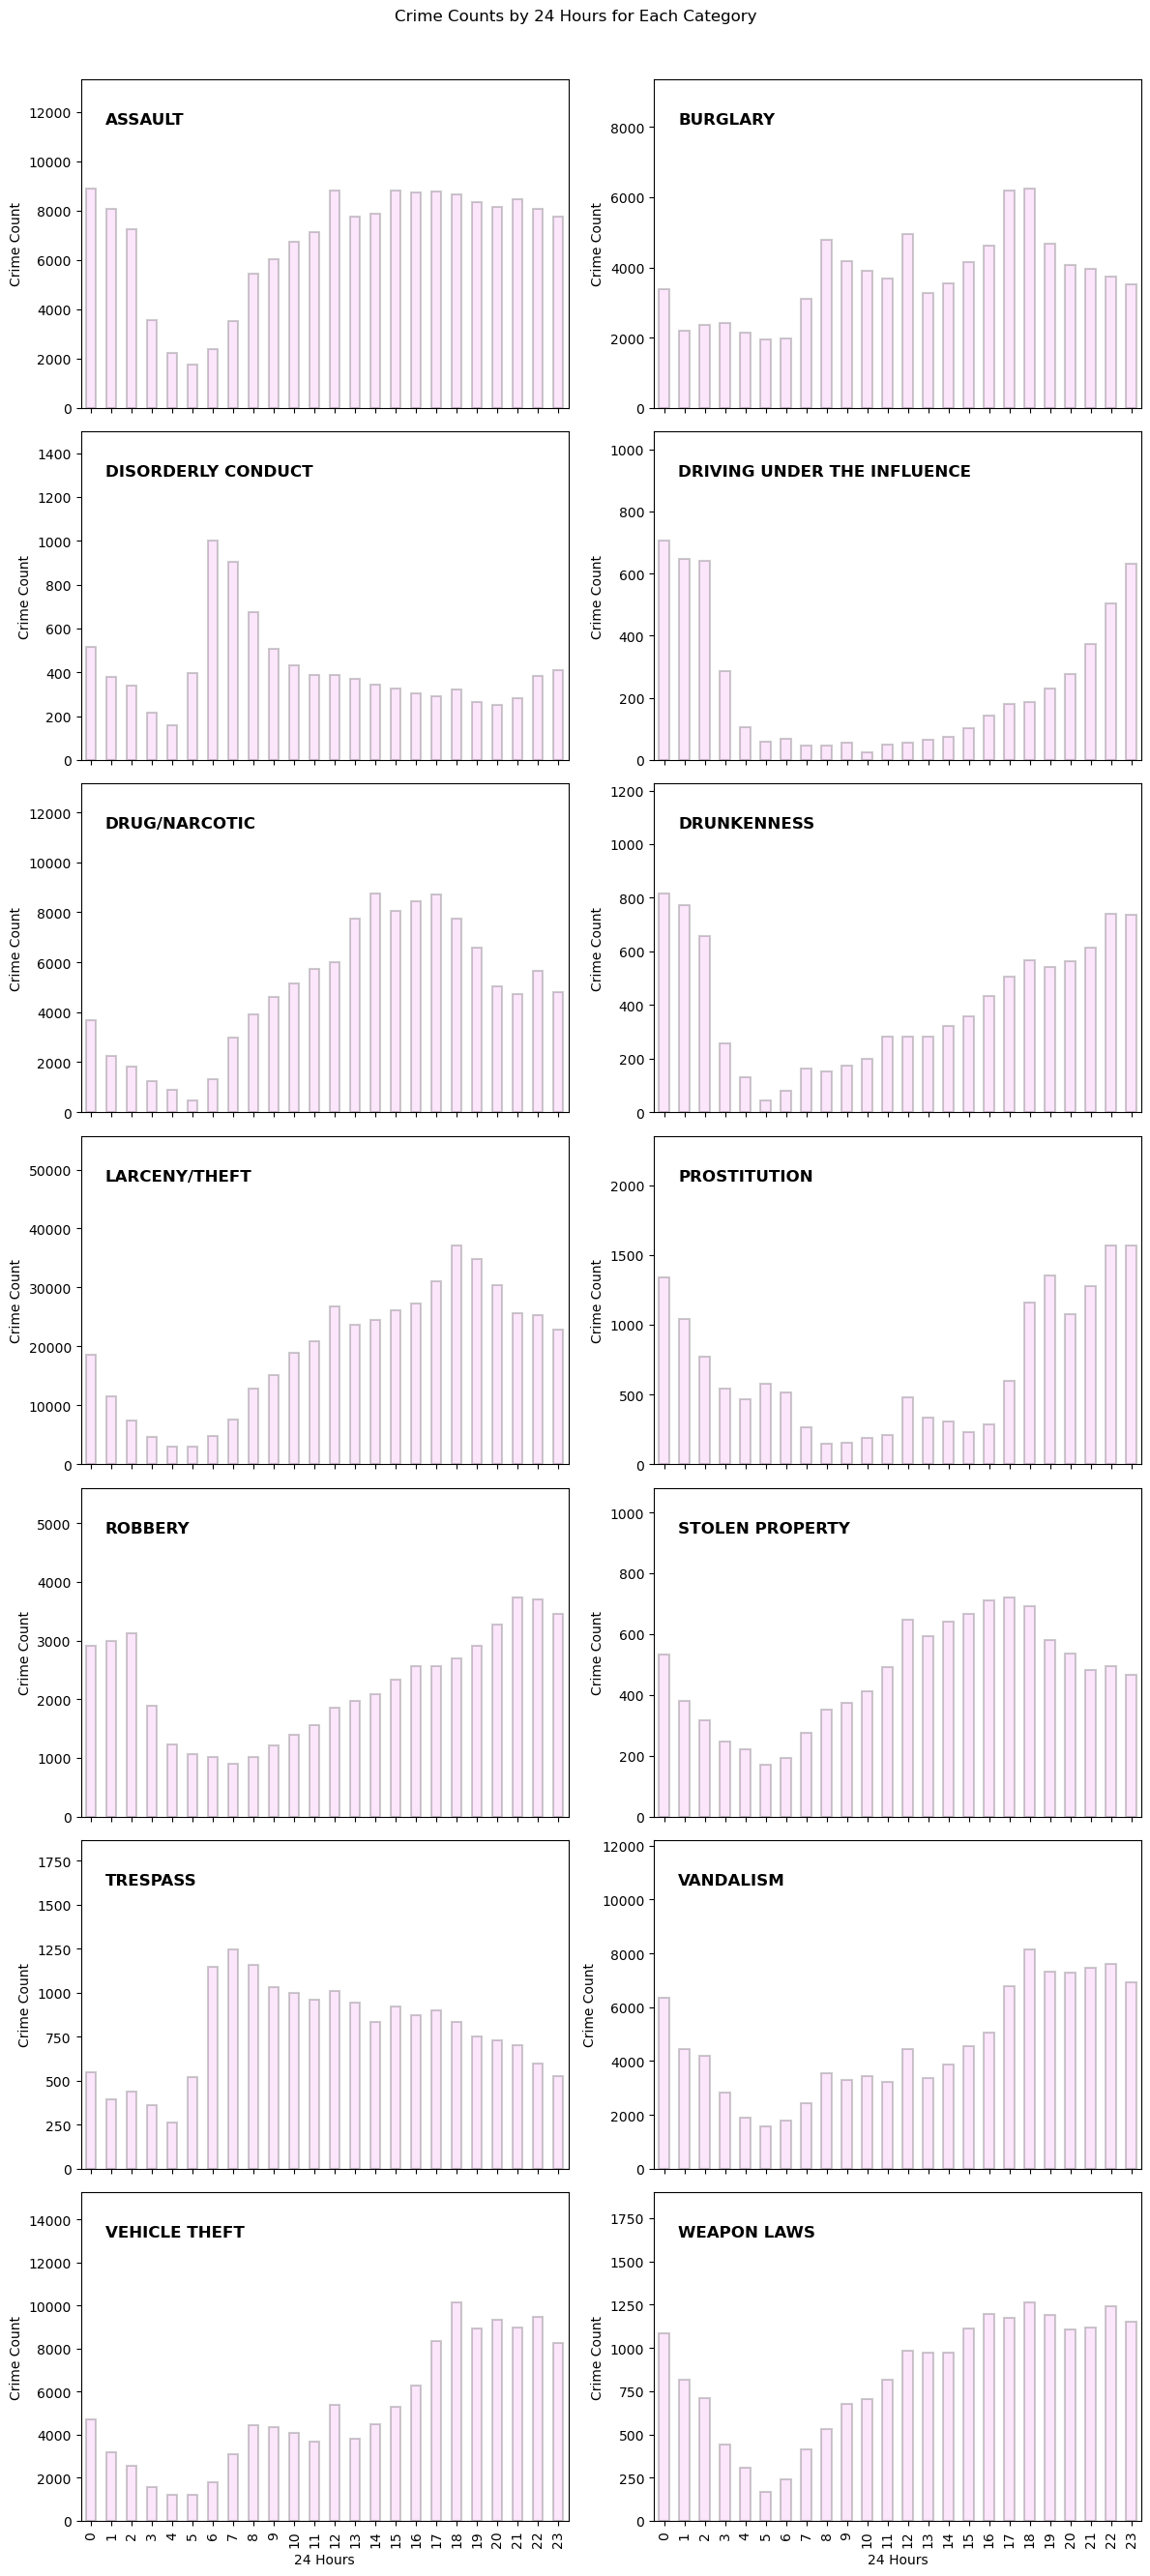

In [10]:
# render
render_result(result, '24 Hours', list(range(24)))

Apparently, the 24 hour trend shows a significant mode of crime committed.

**Nighttime Peaks**:
During the nighttime, especially in the evening and early morning hours, most crime categories show relatively higher counts. This may be associated with fewer people outdoors, lower visibility, and relatively fewer law enforcement resources.

**Early Morning Lulls**:
Crime counts are generally lower in the early morning hours. This could be attributed to most people still resting or preparing for the day's activities during this time.

### 1.1.4: The 168 hours of the week cycle plots

In [11]:
# statistics
data['HourInt'] = data['Time'].astype(str).str[0:2].astype(int)
DaysNumber = {'Monday': 0, 'Tuesday': 1*24, 'Wednesday': 2*24, 'Thursday': 3*24, 'Friday': 4*24, 'Saturday': 5*24, 'Sunday': 6*24}
data['HourOfWeek'] = data['DayOfWeek'].map(DaysNumber) + data['HourInt']
result = data.groupby(['Category', 'HourOfWeek']).size().unstack()

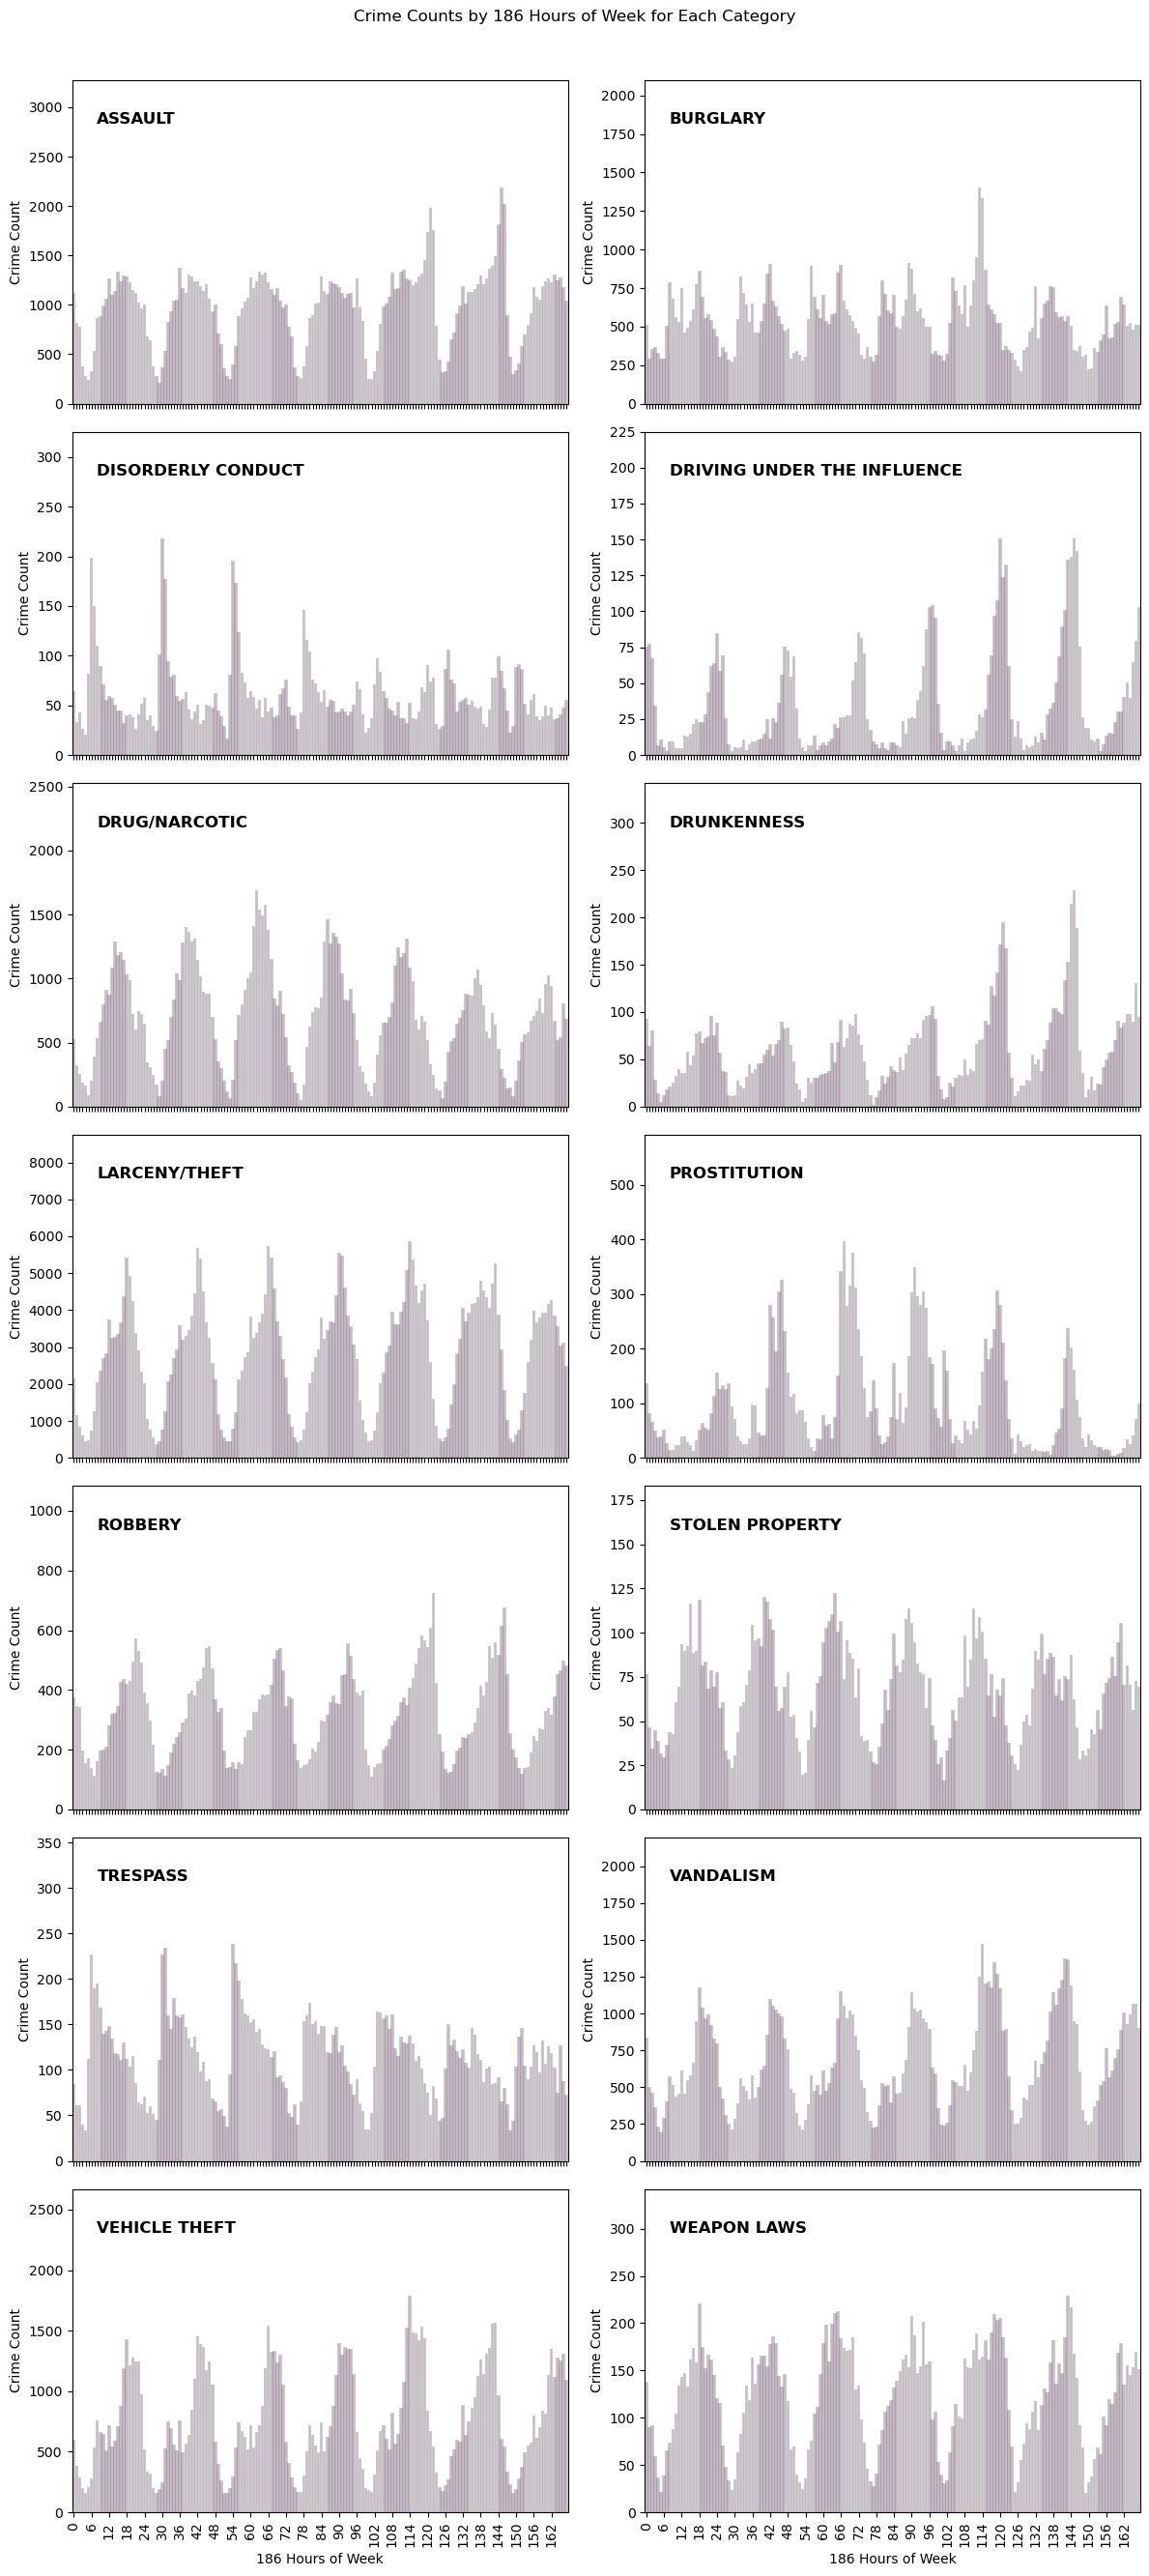

In [12]:
# render
render_result(result, '186 Hours of Week', range(0, 168), MultipleLocator(6))

The patterns of crimes are mostly similar to the combination result of week-day plots and 24-hour cycle plots. Most crimes vary regularly on a daily basis.


## 1.2: Calendar plot

**Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.**

In [13]:
import calplot

In [14]:
# choose a crime type: DRUG/NARCOTIC
chosen_crime= set(['DRUG/NARCOTIC'])
data = required_range_data[required_range_data['Category'].isin(chosen_crime)]

In [15]:
# statistics
daily_counts = data['Date'].value_counts().sort_index()

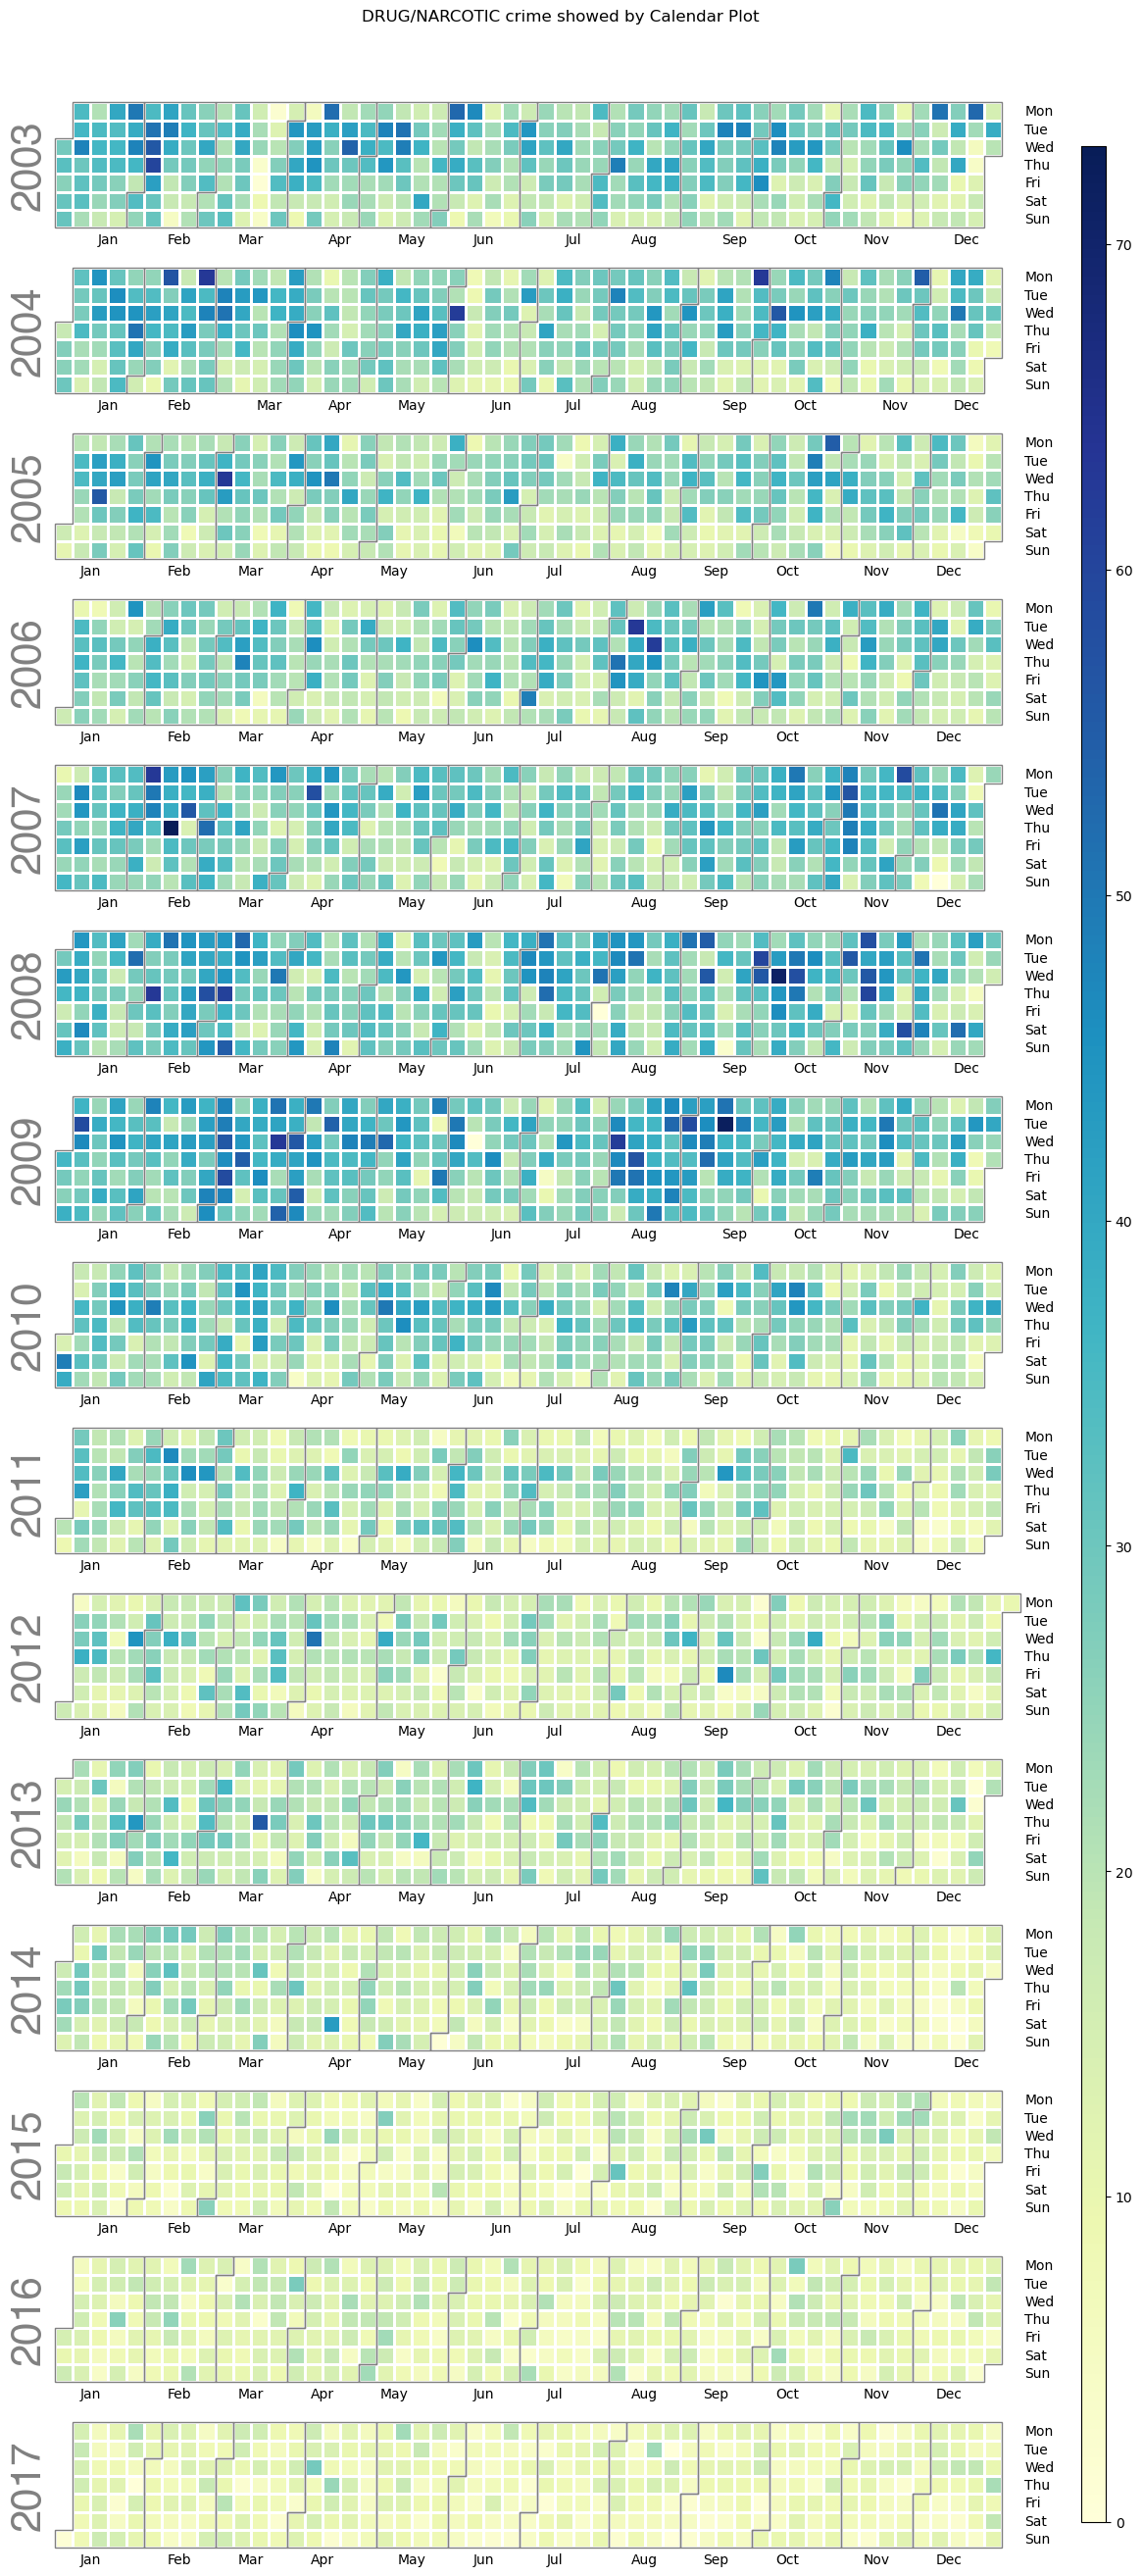

In [16]:
#show
fig, ax = calplot.calplot(daily_counts, cmap='YlGnBu', colorbar=True, suptitle='DRUG/NARCOTIC crime showed by Calendar Plot')
plt.show()

The provided calendar data illustrates the trend of DRUG/NARCOTIC crimes in Chicago from the year 2003 to 2017. 
The data reveals a noticeable decline in the number of DRUG/NARCOTIC crimes over the 15 years.

In the first 8 years, the city experienced a relatively high drug-related crimes, with the number peaking over 30 everyday in average. In the worst situation, such as in 2009, the related crimes grows up to over 50 pre day.

However, as the years progressed, a consistent decrease is evident. 
By 2017, the number had significantly reduced to less than 10 per day in average, indicating a substantial improvement in the situation.

## 1.3: Polar plot

**Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.**

In [17]:
import numpy as np

In [18]:
# choose a crime type: PROSTITUTION
focuscrimes = set(['PROSTITUTION'])
data = required_range_data[required_range_data['Category'].isin(focuscrimes)]

In [19]:
# statistics
data['Hour'] = data['Time'].astype(str).str[0:2].astype(int)
hour_counts = data['Hour'].value_counts().sort_index().reset_index(name='Count')
hour_counts=hour_counts.rename(columns={"index":"Hour"})

In [20]:
# initiallize the parameters
theta = np.linspace(0.0, 2 * np.pi, len(hour_counts['Hour']), endpoint=False)
radii = hour_counts['Count']
colors = plt.cm.viridis(radii/max(radii))

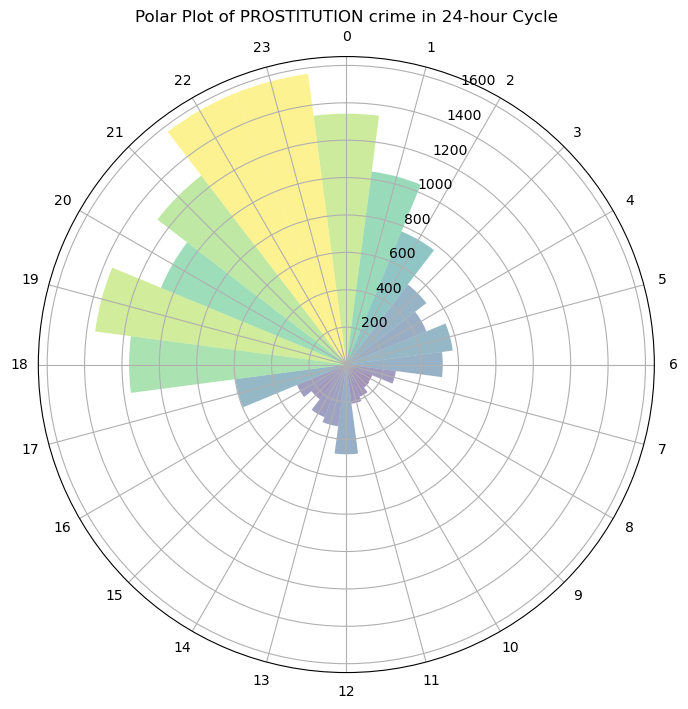

In [21]:
# render
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.bar(theta, radii, width=np.radians(15), bottom=0.0, color=colors, alpha=0.5)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(hour_counts['Hour'])
# show
plt.title('Polar Plot of PROSTITUTION crime in 24-hour Cycle')
plt.show()

**Peak Hours**:
Prostitution crimes tend to peak during the early morning hours (around 18:00 to 00:00), with the highest incidences at 22:00 and 23:00, around 1600 cases.

**Off-Peak Hours**:
Daytime experiences relatively lower crime rates, especially between 8:00 and 10:00, less than 200.

**Day-Night Fluctuations**:
The data exhibits a certain day-night fluctuation, with higher prostitution crimes during the early morning and night, and lower numbers during the day.

**Nightlife Influence**:
The elevated crime rates during the night suggest a potential correlation with the city's nightlife activities. Peaks at 22:00 and 23:00 may be associated with nighttime entertainment and increased human traffic during the off-work hours.

## 1.4: Reflection

**Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).**

For the usage of LLMs in this assignment, I tended to search for basic solutions about which framework or API that I would use mostly to know the explanation of its function, and checked the code example generated from LLMs. Obviously, I still had to modify and research how to display and group data in the accurate way to meet with the requirements. And to adjust the charts better, I had to debug and change the parameters in local, sometimes I might asked LLMs for some advice to choose a perfect solution, while still using StackOverflow or Github.

# 2: Dataviz questions

## 2.1 Data and metadata

**What is the difference between data and metadata? How does that relate to the GPS tracks-example?**

Generally, data refers to raw, unprocessed information that can originate from many sources. Without proper visualization or processing, the data is only of limited use. On the other hand, metadate serves as information about the data itself. This means that it contains basic information about the given data, such as file formats, creation or modification dates, file sizes or creators. Additionally, metadata can include table names, column names and data types.<a name="cite_ref-1"></a> [1]

Regarding the GPS tracks example, the actual data are the longitudes and latitudes. However, even the simple knowledge that these numbers represent coordinates qualifies as metadata. The file extension further supports this observation. Moreover, information on the file creator, the time of tracked points and even the given trip purpose is also metadata.

[1]: https://www.geeksforgeeks.org/difference-between-data-and-metadata/
1: https://www.geeksforgeeks.org/difference-between-data-and-metadata/

## 2.2 Data analysis with the human eye

* **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.**
    * **Mention something that the human eye is very good at.**  
    * **Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.**

We only partially agree with the Sune’s opinion that the eye is a great tool for data analysis. On the one hand, the eye has strong capabilities to comprehend data quickly and intuitively. With a year-long experience and a natural and learned understanding of the world, the eye will be able to analyze data that cannot easily be interpreted by contemporary computational methods. On the other hand, the human eye has a large number of limitations and a strong bias. The pre-existing knowledge will lead it to complete patterns, even where none exist. Furthermore, the human brain tends to struggle with new unknown information, especially when large data sets with more than three dimensions are involved. 

One example where the human eye traditionally outperforms machine learning algorithms is the recognition of faces and understanding emotions. The human brain can quickly identify many faces in a crowd and interpret their emotions, even in poor light conditions. Especially when a face is partially obscured or shown at a different angle, algorithms will struggle with this.

However, the human eye will not be able to predict the weather and analyze all the given meteorological data that is being collected all over the world. Due to the high data volume and complexity of the field, the human eye will fail to assemble all the data into a coherent global picture. Here, numerical methods and machine learning algorithms clearly have the upper hand.

## 2.3 Simpson's paradox

**Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**

The following example was found on Brilliant. <a name="cite_ref-2"></a> [2]
You and your friend answer a quiz with ten questions.
On Saturday, you answer 7/8 = 87.5% of questions correctly and your friend answers 2/2= 100% of questions correctly.
On Sunday, you answer 1/2 = 50% of questions correctly, you friend ansewrs 5/8=62.5% correctly.

On both days, your friend has a higher rate of correct answers.
However, in total your answer rate (8/10 = 80% is higher than his 7/10=70%).

This goes to show that even though your friend's answer rate is higher on each individual day, you still have a higher total correct answer rate.

[2]: https://brilliant.org/wiki/simpsons-paradox/#real-world-examples
2: https://brilliant.org/wiki/simpsons-paradox/#real-world-examples

## 2.4 Exploratory and explanatory data analysis

**In your own words, explain the differnece between exploratory and explanatory data analysis.**

The exploratory data analysis mainly deals with understanding the data, with the goal of gaining insights and preparing the data for modelling. Visualization can be an important tool for exploratory data analysis to identify patterns and discover different phenomena within the data set.
Explanatory data analysis on the other hand serves the purpose of illustrating and explaining the data. It investigates potential reasons behind the patterns identified during the exploratory data analysis. The results are put into a relevant context and simplified to make accessible for a broader audience.

# 3: Visualizing geodata using Plotly

**In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.**

In [22]:
import numpy as np
import pandas as pd
import plotly.express as px

In [23]:
df=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv")

In [24]:
df['Datetime']=pd.to_datetime(df.Date+' '+df.Time,format='%m/%d/%Y %H:%M')
df=df[df.Datetime.dt.year!=2018]

In [25]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    districts = json.load(response)

In [26]:
sunday_theft=df[(df.Category=='VEHICLE THEFT')&(df.Datetime.dt.weekday==6)]

district_theft=np.unique(sunday_theft['PdDistrict'],return_counts=True)
df_distr_vt=pd.DataFrame({'District': district_theft[0], 'Vehicle thefts':district_theft[1]})

In [27]:
fig = px.choropleth_mapbox(df_distr_vt, geojson=districts, locations='District', color='Vehicle thefts',
                           color_continuous_scale=['green','yellow','red'],
                           range_color=(0, 3000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.772, "lon": -122.431}, 
                           opacity=0.5,
                           labels={'Vehicle thefts':'Number of vehicle thefts'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**

According to the map, the district Tenderloin has by far the lowest total number of vehicle thefts on a Sunday, thus being the safest place to leave a car. Ingleside is by far the worst place to leave a car. 
However, only the absolute number of vehicle thefts has been taken into account. It becomes apparent that Tenderloin is significantly smaller than Ingleside. 

* **Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors)**:
    * **Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?**
    * **Why do you think perceptual errors are a problem? Try to think of a few examples.**

For a more accurate representation, a ratio such as the number of thefts per residents or per registered vehicles in each district would be required.

In [28]:
fig = px.choropleth_mapbox(df_distr_vt, geojson=districts, locations='District', color='Vehicle thefts',
                           color_continuous_scale=['green','yellow','red'],
                           range_color=(0, 9000),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.772, "lon": -122.431}, 
                           opacity=0.5,
                           labels={'Vehicle thefts':'Number of vehicle thefts'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

By increasing the scale of the data values, the plot above can be manipulated to make the ifference between the districts appear less apparent. Suddenly, all districts appear in similar shades of green.

In general, perceptual errors can be a problem (e.g. an axis not starting at 0, or having a misleading range). Differences between separate values / observations may be overstated or hidden. For important decisions, e.g. in political elections, this can have a strong influence and can be misused to manipulate voters.

# 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4).

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

### In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.

Temporal activity for PROSTITUTION: When data is binned, the spikes could disproportionately affect the mean values within those bins, skewing the results. If there's an average calculation within each bin, a single large value can pull the average up, while in reality, most of the data might not be near that spike at all. Without recognizing these anomalies, one might conclude that there are regular extreme variations in the data, leading to incorrect assumptions about volatility or trends.

Jitter-plot: The clustering of data points at round-number times suggests a tendency in data recording rather than actual crime occurrence. This could be due to reporting practices where times are rounded to the nearest convenient interval, or a data entry convention rather than a true reflection of when incidents occur. When data is binned by time, this can lead to an overrepresentation of crimes at these specific intervals and an underrepresentation at other times. Binning can mask this irregularity, artificially creating peaks and troughs in crime rates that correspond to these time stamps rather than to the actual distribution of crimes throughout the day. Not accounting for these irregularities might lead to misconceptions about crime patterns, such as believing that crimes are more likely to occur at these exact times. This could have implications for law enforcement and public perception, leading to misguided strategies and a misunderstanding of when crimes are truly more likely to happen.

Hall of Justice: Binning data in a heatmap could aggregate incorrectly addressed data, creating an artificial hotspot. Since heatmaps average data over geographic areas, the actual distribution of incidents could be misrepresented, implying a concentration of offenses in and around the Hall of Justice.If not recognized, this data anomaly could lead to serious misconceptions about safety and crime in the vicinity of the Hall of Justice. It could affect public perception, potentially stigmatizing the area and impacting decisions made by residents, visitors, and policymakers regarding safety measures and resource allocation.

### Find your own example of human noise in the data and visualize it.

Below is a different approach of insepcting the bias towards rounding the time. The histogram below displays the distribution of incidents by the minute within the hour. We can observe a very pronounced peak at the 0-minute mark, which suggests that a disproportionately high number of incidents are recorded on the hour. Additionally, there are smaller but still notable spikes at the 30-minute mark and to a lesser extent at the 15 and 45-minute marks.

This pattern is indicative of human noise in the data. It suggests that when times are being recorded, there is a bias towards rounding off to these "round" numbers rather than reporting the exact minute. This could be due to convenience in data entry, where incident times are approximated to the nearest convenient time marker, or it could be a reflection of reporting practices where incidents are logged in batches at the top of the hour.

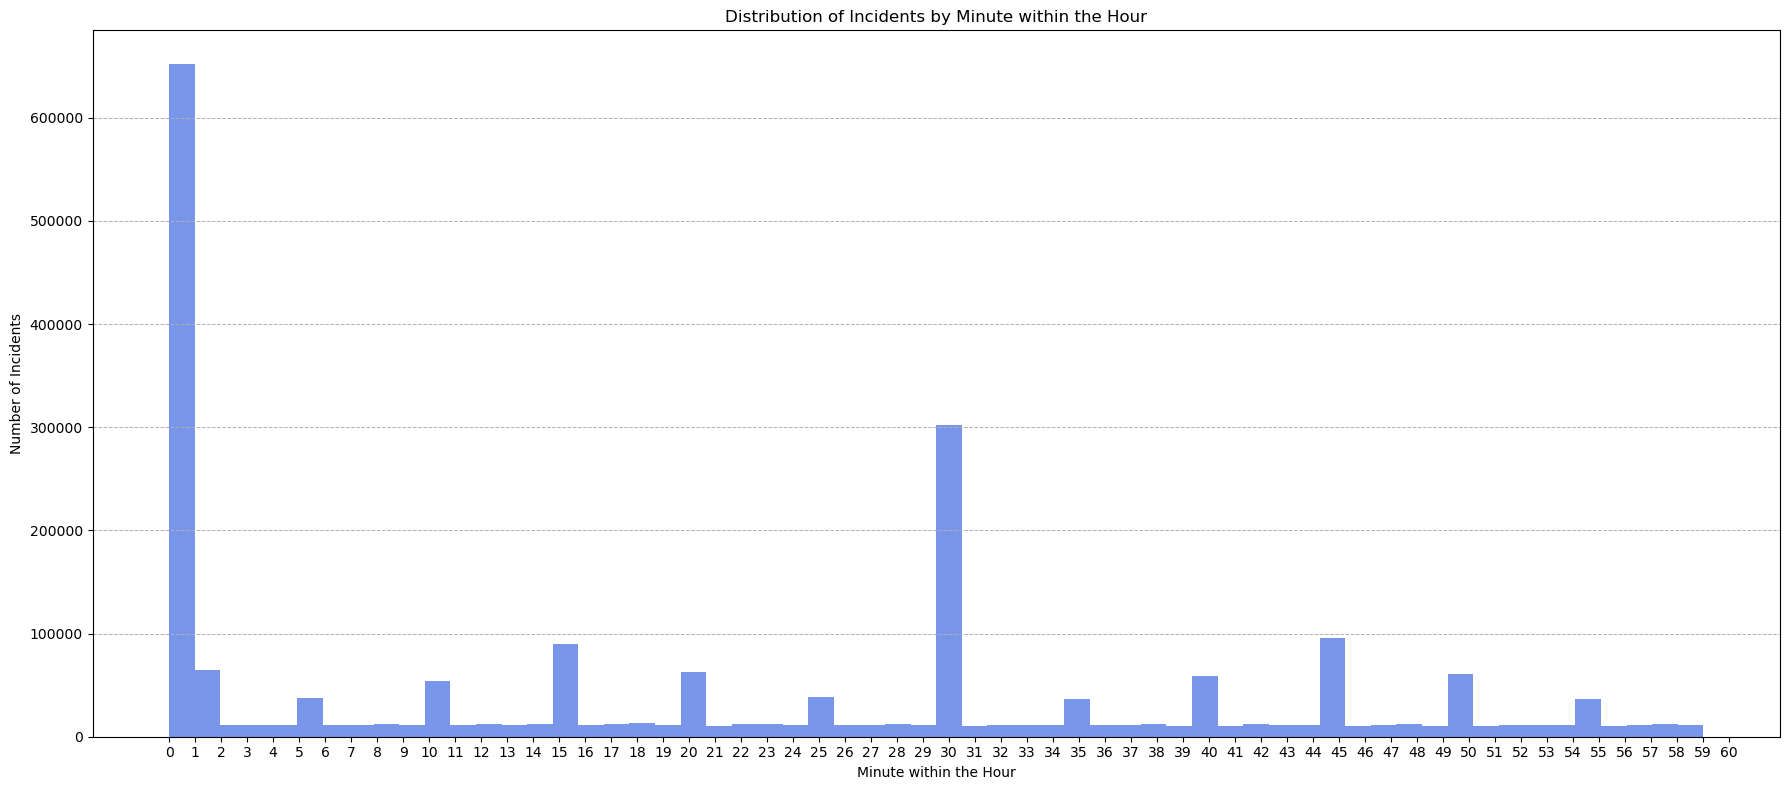

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240214.csv')

# Convert the 'Time' column to datetime to extract the minute
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')

# Extract the minute part of the timestamp
data['Minute'] = data['Time'].dt.minute

# Plotting the distribution of incidents by minute within the hour
plt.figure(figsize=(18, 8))
plt.hist(data['Minute'], bins=60, color='royalblue', alpha=0.7)  # 1-minute interval bins
plt.title('Distribution of Incidents by Minute within the Hour')
plt.xlabel('Minute within the Hour')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(61), labels=[str(minute) for minute in range(61)])
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

### Did you find LLMs useful for anything in this exercise? Explain why/why not.

LLMs provided assistance in explaining certain aspects of the exercise. This guidance can be valuable for gaining insights or understanding complex data relationships. However, it was crucial to engage in personal reflection and independent analysis. An LLM's input should be considered as supplementary, encouraging deeper exploration and critical thinking, rather than being the sole source of interpretation or decision-making.

# Contributions

| Name | Part 1 | Part 2 & 3 | Part 4 |
|----------|----------|----------|----------|
| Yili Ge   | In charge   | Review | Review |
| Magnus Mac Doberenz  | Review   | In charge | Review |
| Shakir Maytham Shaker   | Review   | Review  | In charge |

Mostly, we all discussed in time to share informations and ideas with each other for this assignment.